In [1]:
%load_ext autoreload
%autoreload 2

import gym
import matplotlib.pyplot as plt


import time
from algorithm_analysis.plotting import plot_episode_length_over_time, plot_episode_reward_over_time
from algorithm_analysis import algorithms
from envs.broken_components import BrokenComponentsEnv
from envs.data_handler import DataHandler

In [2]:
t0 = time.monotonic()
dataHandler = DataHandler()
broken_components = dataHandler.get_sample_component_failure_pairs(20)
env = BrokenComponentsEnv(broken_components, reward_modus='raw')
# env = gym.make('Taxi-v3')
print(f'Time until env is ready: {time.monotonic()-t0}')


Time until env is ready: 20.564229270996293


In [3]:
discount_rates = [0.9, 0.3]
learning_rates = [0.01, 0.1]
num_plots = 2
total_runs = len(discount_rates) * len(learning_rates)
episodes = 1000

Run qlearning with 1048576 states and 20 actions.

Run qlearning with 1048576 states and 20 actions.

Run qlearning with 1048576 states and 20 actions.

Run qlearning with 1048576 states and 20 actions.

Time until plots are ready: 169.39648935799778


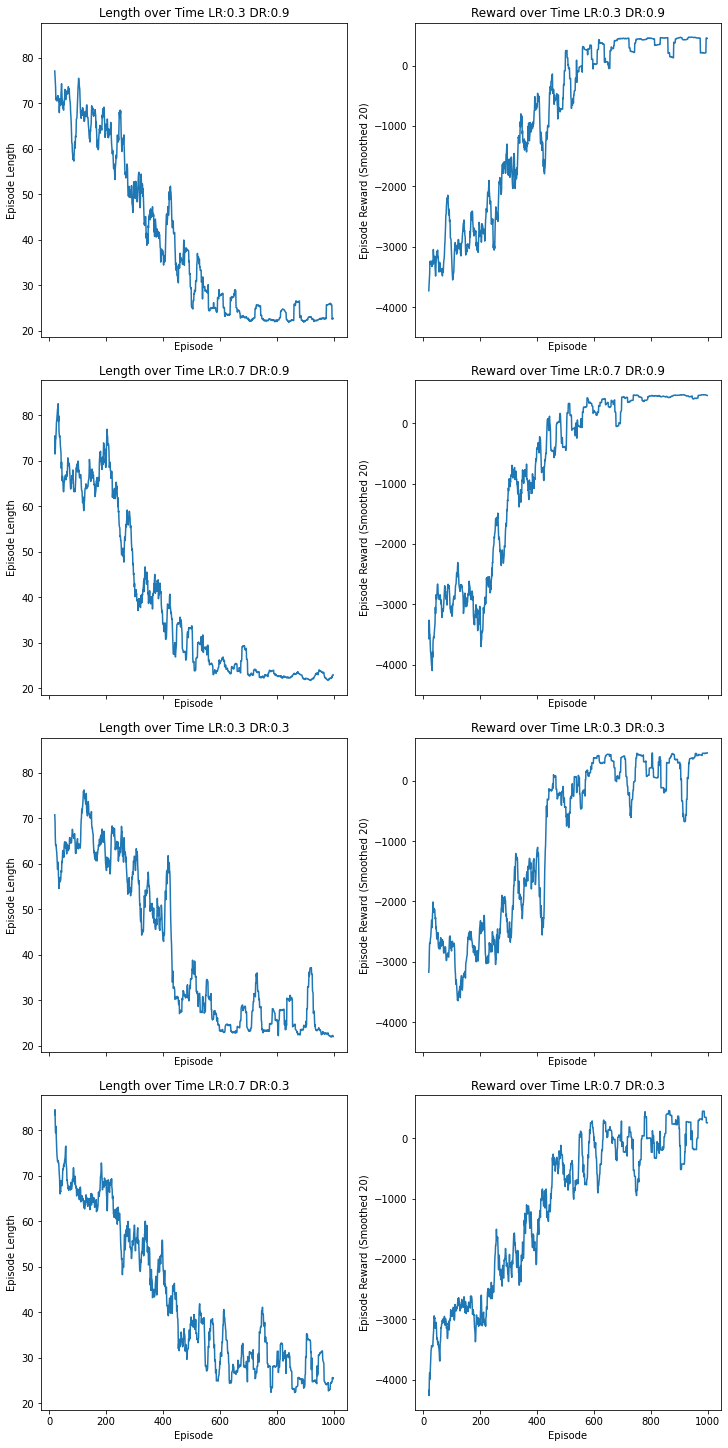

In [4]:
t0 = time.monotonic()
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 5*total_runs), constrained_layout=True, sharex=True, sharey='col')
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        metric = algorithms.run('qlearning', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                               learning_rate=learning_rate, discount_rate=discount_rate)
        ax_row = i * len(learning_rates) + j
        plot_episode_length_over_time(axs[ax_row, 0], metric, smoothing_window=20)
        plot_episode_reward_over_time(axs[ax_row, 1], metric, smoothing_window=20)
        

print(f'Time until plots are ready: {time.monotonic()-t0}')
plt.show()

Run sarsa with 1048576 states and 20 actions.

Run sarsa with 1048576 states and 20 actions.

Run sarsa with 1048576 states and 20 actions.

Run sarsa with 1048576 states and 20 actions.

Time until plots are ready: 113.11505700999987


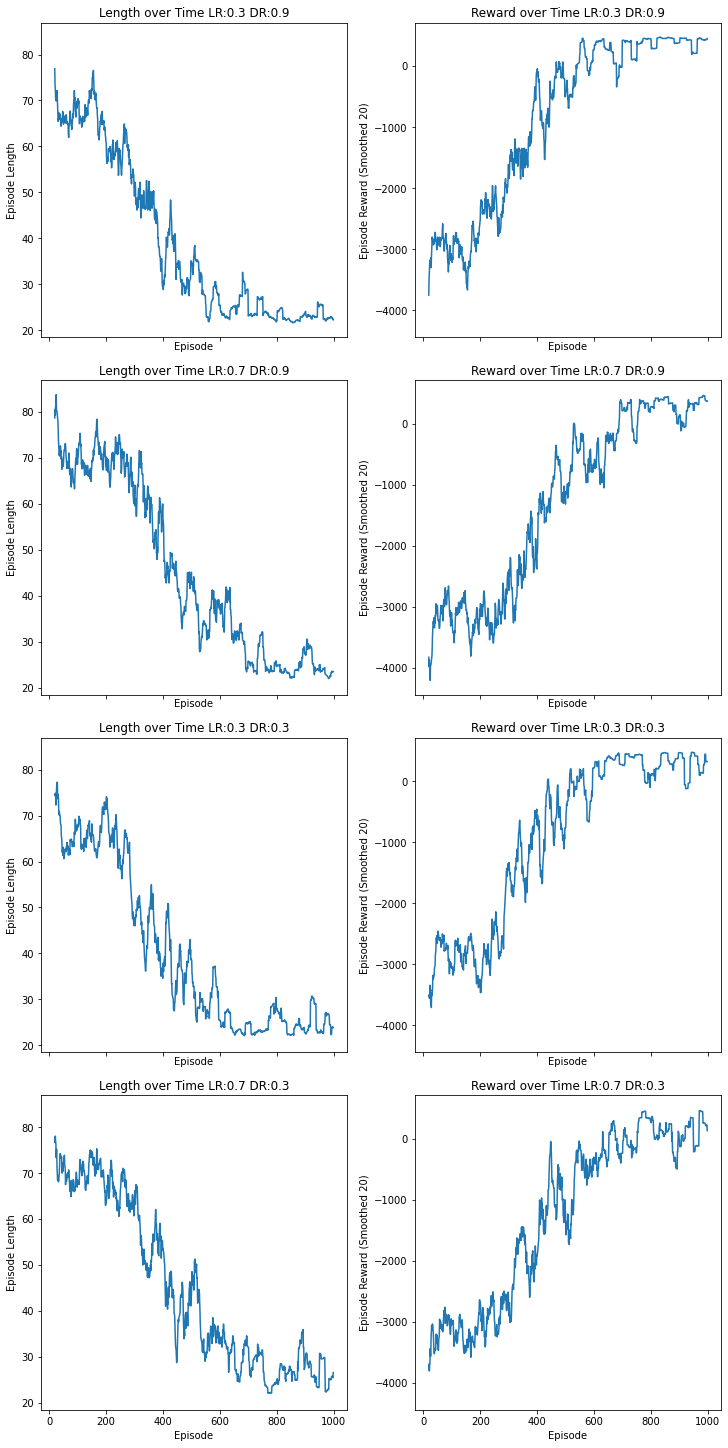

In [5]:
t0 = time.monotonic()
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 5*total_runs), constrained_layout=True, sharex=True, sharey='col')
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        metric = algorithms.run('sarsa', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                               learning_rate=learning_rate, discount_rate=discount_rate)
        ax_row = i * len(learning_rates) + j
        plot_episode_length_over_time(axs[ax_row, 0], metric, smoothing_window=20)
        plot_episode_reward_over_time(axs[ax_row, 1], metric, smoothing_window=20)


print(f'Time until plots are ready: {time.monotonic()-t0}')
plt.show()
